In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    N=tx.shape[0]
    err=y-tx@w
    loss=1/(2*N)*np.transpose(err)@err
    return loss

In [5]:
w=np.transpose([1,2])
compute_loss(y,tx,w)

2694.4833658870843

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0s, w1s):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0s), len(w1s)))
    # ***************************************************
    for i, w0 in enumerate(w0s):
        for j, w1 in enumerate(w1s):
            losses[i,j]=(compute_loss(y, tx, np.transpose([w0,w1])))      
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.006 seconds


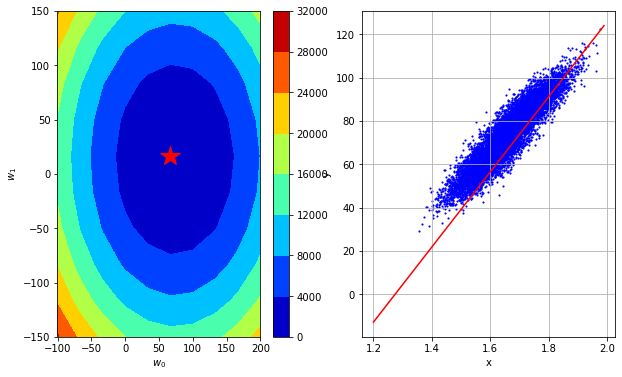

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

Does this look like a good estimate? Why not? What is the problem? Why is the MSE plot not smooth?

→ Not really: the red line does not pass in the middle of our data points as one could have expected.

→ The MSE plot us not smooth because the value in each "square" corresponds to the value of the point on the grid. Since the number of points on the grid is finite and small, the MSE plot is not smooth.

Repeat the above exercise by changing the grid spacing to 10 instead of 50. Compare the new fit to the old one.

→ The estimate is bettern anf the MSE plot appears smoother. This is because we are estimating an higher number of points.


To obtain an accurate fit we need a fine grid, the accuracy is better if we increase the number of grid points
Nncreasing the number of values affect the computational cost by increasing significantly the execution time

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N=tx.shape[0]
    err=y-tx@w
    grad=-1/N*np.transpose(tx)@err
    return grad

In [9]:
w=np.transpose([100,20])
print(compute_gradient(y, tx, w))
w=np.transpose([50,10])
print(compute_gradient(y, tx, w))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


What do the values of these gradients tell us? For example, think about the norm of this vector. In which case are they bigger? What does that mean?

→ The values of the gradients are bigger if we are far from the function minimum. It indicates the direction that needs to be taken in order to minimize the cost function and is an indication on the "distance" from it

Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_gradient(y, tx, w)
        loss=compute_loss(y, tx, w)
        w=w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492242
Gradient Descent(1/49): loss=265.30246210896024, w0=66.69746902191571, w1=12.266538315839977
Gradient Descent(2/49): loss=37.8783795504413, w0=71.31498610804834, w1=13.115760199244315
Gradient Descent(3/49): loss=17.410212120174474, w0=72.70024123388814, w1=13.370526764265625
Gradient Descent(4/49): loss=15.568077051450459, w0=73.11581777164007, w1=13.446956733772021
Gradient Descent(5/49): loss=15.402284895265296, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.387363601208632, w0=73.27789262136334, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261672, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412117, w1=

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

The cost is being minimized, the algorithm is converging fast (5 iterations are sufficient to obtain a decent solution). The final values for the paramaters look very good

If the step-size is too slow, the procedure convergence too slow and the 50 iterations are not sufficient. If the step-size is too big (bigger than 2), the procedure diverges

If we change the initial values, the procedure converges, the time to convergence may howver vary a little bit

# 4 Stochastic gradient descent

In [19]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    N=tx.shape[0]
    err=y-tx@w
    grad=-1/N*np.transpose(tx)@err
    return grad


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    batch=batch_iter(y,tx,batch_size)
    data=next(batch)
    y=data[0]
    tx=data[1]
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_gradient(y, tx, w)
        loss=compute_loss(y, tx, w)
        w=w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Stochastic gradient sescent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [20]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic gradient sescent(0/49): loss=3170.674942241757, w0=54.91650095336037, w1=28.32171189912999
Stochastic gradient sescent(1/49): loss=210.35046922327024, w0=64.29121053940638, w1=21.672628389554852
Stochastic gradient sescent(2/49): loss=66.90274424177873, w0=68.77054572275141, w1=17.651193388301294
Stochastic gradient sescent(3/49): loss=27.365388744734833, w0=71.12251826149117, w1=15.517467194520076
Stochastic gradient sescent(4/49): loss=16.362060641489514, w0=72.36303424018085, w1=14.391531944352856
Stochastic gradient sescent(5/49): loss=13.29975101475102, w0=73.01746050513215, w1=13.79753938764526
Stochastic gradient sescent(6/49): loss=12.44748699613798, w0=73.36270205698419, w1=13.484179243667489
Stochastic gradient sescent(7/49): loss=12.21029544922849, w0=73.54483377262827, w1=13.318866514657666
Stochastic gradient sescent(8/49): loss=12.144283240926079, w0=73.64091711567896, w1=13.23165600534633
Stochastic gradient sescent(9/49): loss=12.125911542179907, w0=73.691605

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [37]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

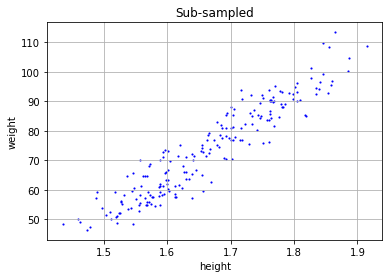

In [38]:
plt.scatter(height, weight, marker=".", color='b', s=5)
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Sub-sampled")
plt.grid()

In [39]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/49): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/49): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/49): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=13.64343490969756, w0=73.63214202236942, w1=1

In [40]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [41]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

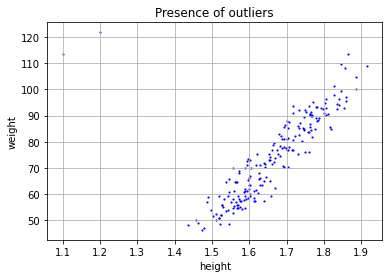

In [42]:
plt.scatter(height, weight, marker=".", color='b', s=5)
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Presence of outliers")
plt.grid()

In [43]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/49): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/49): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/49): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/49): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/49): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/49): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/49): loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/49): loss=65.93073020036948, w0=74.06767464603033, w1=11.034875

In [44]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

The fit is not of a good quality

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [45]:
def compute_MAE_loss(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    N=tx.shape[0]
    err=tx@w-y
    loss=1/N*np.sum(np.abs(err))
    return loss

In [46]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    N=tx.shape[0]
    err=tx@w-y
    g=np.sign(err)
    zeros=np.where(g==0)
    if len(zeros[0])!=0:
        print('Non-differentiable point encountered')
    subgrad=np.ndarray(shape=[len(w),])
    for i in range(len(w)):
        subgrad[i]=(1/N)*sum(tx[:,i]*g)
    return subgrad

In [47]:
err=tx@w-y
err[0]=0
zeros=np.where(err==0)
len(zeros[0])

1

In [48]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Subgradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_subgradient(y, tx, w)
        loss=compute_MAE_loss(y, tx, w)
        w=w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [49]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 70
gamma = 1.5

# Initialization
w_initial = np.array([10, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/69): loss=64.06780585492636, w0=11.5, w1=10.000000000000002
Gradient Descent(1/69): loss=62.56780585492637, w0=13.0, w1=10.000000000000004
Gradient Descent(2/69): loss=61.06780585492637, w0=14.5, w1=10.000000000000005
Gradient Descent(3/69): loss=59.56780585492637, w0=16.0, w1=10.000000000000007
Gradient Descent(4/69): loss=58.06780585492637, w0=17.5, w1=10.000000000000009
Gradient Descent(5/69): loss=56.56780585492637, w0=19.0, w1=10.00000000000001
Gradient Descent(6/69): loss=55.06780585492637, w0=20.5, w1=10.000000000000012
Gradient Descent(7/69): loss=53.56780585492637, w0=22.0, w1=10.000000000000014
Gradient Descent(8/69): loss=52.06780585492637, w0=23.5, w1=10.000000000000016
Gradient Descent(9/69): loss=50.56780585492637, w0=25.0, w1=10.000000000000018
Gradient Descent(10/69): loss=49.06780585492637, w0=26.5, w1=10.00000000000002
Gradient Descent(11/69): loss=47.56780585492637, w0=28.0, w1=10.000000000000021
Gradient Descent(12/69): loss=46.06780585492637, w0=

In [50]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=71, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

The fit is better using MAE than when using MSE

The optimization algorithm did not encounter any non-differentiable point

In [51]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    batch=batch_iter(y,tx,batch_size)
    data=next(batch)
    y=data[0]
    tx=data[1]
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_subgradient(y, tx, w)
        loss=compute_MAE_loss(y, tx, w)
        w=w-gamma*grad
        ws.append(w)
        losses.append(loss)
        print("Stochastic subgradient sescent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [52]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 70
gamma = 1.5

# Initialization
w_initial = np.array([10, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Stochastic subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/69): loss=64.06780585492636, w0=11.5, w1=10.000000000000002
Gradient Descent(1/69): loss=62.56780585492637, w0=13.0, w1=10.000000000000004
Gradient Descent(2/69): loss=61.06780585492637, w0=14.5, w1=10.000000000000005
Gradient Descent(3/69): loss=59.56780585492637, w0=16.0, w1=10.000000000000007
Gradient Descent(4/69): loss=58.06780585492637, w0=17.5, w1=10.000000000000009
Gradient Descent(5/69): loss=56.56780585492637, w0=19.0, w1=10.00000000000001
Gradient Descent(6/69): loss=55.06780585492637, w0=20.5, w1=10.000000000000012
Gradient Descent(7/69): loss=53.56780585492637, w0=22.0, w1=10.000000000000014
Gradient Descent(8/69): loss=52.06780585492637, w0=23.5, w1=10.000000000000016
Gradient Descent(9/69): loss=50.56780585492637, w0=25.0, w1=10.000000000000018
Gradient Descent(10/69): loss=49.06780585492637, w0=26.5, w1=10.00000000000002
Gradient Descent(11/69): loss=47.56780585492637, w0=28.0, w1=10.000000000000021
Gradient Descent(12/69): loss=46.06780585492637, w0=

In [53]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=71, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

The two algorithms variants are better to the one using MSE